In [87]:
from bs4 import BeautifulSoup

filep = '/Users/ath/Documents/GoogleSearches/Takeout/My Activity/Search/'


First we start by importing the data into python and getting them in a usable format!

In [88]:
f2imp = filep+'MyActivity.html'

with open(f2imp) as fp:
    soup = BeautifulSoup(fp)

divs = soup.find_all('div', class_="content-cell mdl-cell mdl-cell--6-col mdl-typography--body-1")

search_queries = []
dates = []

for element in divs:
    if str(element.contents[0]).startswith('Searched'):
        search_queries.append(element.contents[1].text.split())
        dates.append(element.contents[-1])

/Users/ath/anaconda/lib/python3.5/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [89]:
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
filtered_words = [[word for word in single_search if word not in stopwords.words('english')] for single_search in mysearches]

We first extract the most common searches, by creating a dictionary with the frequency of each word

In [90]:
wordfreq = {}
for search in filtered_words:
    for word in search:
        if word not in wordfreq:
            wordfreq[word] = 0 
        wordfreq[word] += 1
        
sortedsearches = sorted(wordfreq, key=wordfreq.__getitem__,reverse=True)


For plotting purposes data can be transformed into a dataframe:

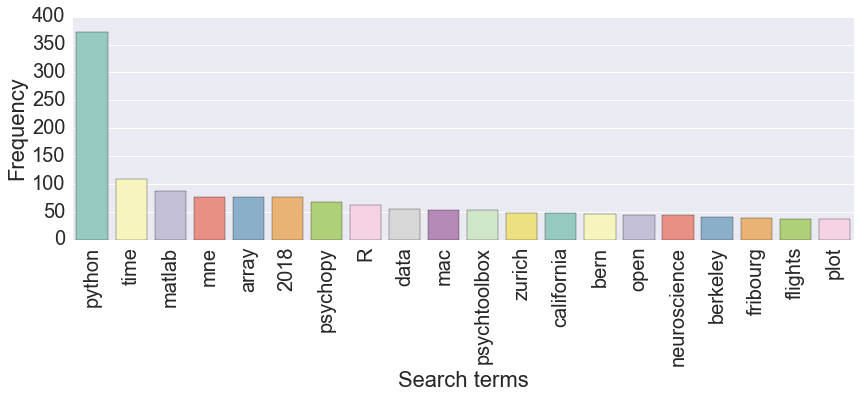

In [91]:
import pandas as pd

searches_df = pd.DataFrame(data={
    'words': list(wordfreq.keys()),
    'frequency': list(wordfreq.values())
})

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

fig=plt.figure(figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')

items2plot = 20
sns.set(font_scale = 2)
sns.barplot(y='frequency',
            x='words',
            data=searches_df.sort_values(by=['frequency'],ascending=False)[:items2plot], palette="Set3")

plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.xlabel('Search terms')

In [95]:
dates[-100:-1]

['Jul 2, 2013, 8:34:37 AM',
 'Jul 2, 2013, 7:56:50 AM',
 'Jul 2, 2013, 7:22:12 AM',
 'Jul 2, 2013, 7:08:22 AM',
 'Jul 2, 2013, 5:17:50 AM',
 'Jul 2, 2013, 5:15:39 AM',
 'Jul 2, 2013, 5:12:24 AM',
 'Jul 2, 2013, 4:47:27 AM',
 'Jul 1, 2013, 4:25:05 PM',
 'Jul 1, 2013, 4:07:36 PM',
 'Jul 1, 2013, 11:18:49 AM',
 'Jul 1, 2013, 10:15:06 AM',
 'Jul 1, 2013, 9:56:28 AM',
 'Jul 1, 2013, 9:55:23 AM',
 'Jul 1, 2013, 9:52:07 AM',
 'Jul 1, 2013, 9:41:39 AM',
 'Jul 1, 2013, 9:40:38 AM',
 'Jul 1, 2013, 9:40:04 AM',
 'Jul 1, 2013, 9:30:55 AM',
 'Jul 1, 2013, 9:30:50 AM',
 'Jul 1, 2013, 9:25:19 AM',
 'Jul 1, 2013, 9:13:52 AM',
 'Jul 1, 2013, 7:29:24 AM',
 'Jul 1, 2013, 7:29:21 AM',
 'Jul 1, 2013, 4:25:15 AM',
 'Jun 30, 2013, 5:17:38 PM',
 'Jun 30, 2013, 5:17:24 PM',
 'Jun 30, 2013, 5:16:17 PM',
 'Jun 30, 2013, 5:15:08 PM',
 'Jun 30, 2013, 5:15:00 PM',
 'Jun 30, 2013, 5:12:11 PM',
 'Jun 30, 2013, 2:28:21 PM',
 'Jun 30, 2013, 2:28:07 PM',
 'Jun 30, 2013, 2:27:57 PM',
 'Jun 30, 2013, 2:27:12 PM',
 'Jun 30

In [84]:
element.contents[1].text.split()

['berlin', 'conserta']

In [86]:
search_queries[0]

['how', 'to', 'request', 'your', 'google', 'search', 'data']